## MEMUAT DATA SET

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
data_clean = pd.read_csv('cleaning_dataset.csv')
data_clean

,Tweet
0,Ingat! Cantumkan Harta Saat Lapor SPT Tahunan Pajak https://t.co/pUlQMjTkZv
1,"@CNNIndonesia Dasar MALING BAJINGAN tengik bisa ngeles juga... Berapa banyak rakyat Indonesia yang hidup miskin, uangnya rakyat untuk foya-foya ASN dirjen pajak, Kemenkeu, beacukai...?"
2,@bendvi setuju mas! i’ve been travelled around the world and i can i say customs indonesia much better drpd negara lain. sepengalamanku jg kl ngenain pajak sesuai dgn aturan kok ini yg heboh ini itu cm krn gaterima aja ngeluarin uang utk penerimaan negara pdhl hrsny dia tau itu konsekuen
3,"Haduh..\n\nYg namanya lapor pajak mana ada yg pake 1 pembukuan di Indonesia ini..\n\nLedger 3..\n1. Pemegang saham..\n2. Internal..\n3. Pajak..\n\nBeda2 semua..\n\nLoe lapor semua mana bs cuan gede..\nApalagi pajak..\n\nBayar PPN, PPh badan, PPh Pribadi..\n\nSulap2 sm 'Konsultan' kek Alun.."
4,"@susipudjiastuti Indonesia dapet cukai import, per kg dpt cukai 1000 perak/ kg. Maka Indonesia akan mendapatkan pajak import 1000x1 000 000 000 =;Rp 1 000 T... mantaaap.."
...,...
7475,@BukanHindia (*) NPWP wajib bagi seluruh Wajib Pajak sesuai UU perpajakan yang berlaku di Indonesia.\nPersyaratan lainnya sbb: (2)
7476,"Mulai ngamuk.. Tak traktir ngopi, po? Tak jelasne sewengi sesuai UU tata negara, Sistem Pemerintahan, kenapa harus ada presiden, kenapa harus ada pajak, kenapa harus ada tata tertib, kenapa harus ada ini itu di Indonesia? Dijelasno neng kene suwen.."
7477,"@shxkkaku dengan /mnyebutnamadn/ di wakanda, passwordnya kopi kapal api, kopi orang indonesia\n\ncoba tebak saya siapa pak nanti dapat 3 jeti dipotong pajak, clue depannya ni belakangnya lou"
7478,@kring_pajak min bedanya penyertaan modal pada perusahaan yang sudah didirikan - kerjasama dengan lembaga pengelola investasi dan yang kerjasama dengan lembaga pengelola investasi - investasi langsung pada perusahaan di wilayah negara rep indonesia tuh apa ya?


## Pre-processing : Removing Punctuation, Case Folding & Removing Urls Username

In [2]:
import pandas as pd
import re

# Define regex patterns for URL, username, and hashtag
url_pattern = re.compile(r'http[s]?://\S+')
username_pattern = re.compile(r'@[A-Za-z0-9_]+')
hashtag_pattern = re.compile(r'#\w+\b')

# Define function for preprocessing
def preprocess_text(text):
    # Remove punctuation (except "@")
    text = re.sub(r'[^\w\s@]|[\d]', '', text)
    
    # Case folding
    text = text.lower()
    
    # Remove URL, username, and hashtag
    text = re.sub(url_pattern, '', text)
    text = re.sub(username_pattern, '', text)
    text = re.sub(hashtag_pattern, '', text)
    
    return text

# Read data from CSV file
data = data_clean

# Apply preprocessing function to 'Tweet' column
data['Tweet'] = data['Tweet'].apply(preprocess_text)

# Remove remaining URLs
data['Tweet'] = data['Tweet'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

data_pre = data


In [3]:
data_pre.head(5)

,Tweet
0,ingat cantumkan harta saat lapor spt tahunan pajak
1,dasar maling bajingan tengik bisa ngeles juga berapa banyak rakyat indonesia yang hidup miskin uangnya rakyat untuk foyafoya asn dirjen pajak kemenkeu beacukai
2,setuju mas ive been travelled around the world and i can i say customs indonesia much better drpd negara lain sepengalamanku jg kl ngenain pajak sesuai dgn aturan kok ini yg heboh ini itu cm krn gaterima aja ngeluarin uang utk penerimaan negara pdhl hrsny dia tau itu konsekuen
3,haduh\n\nyg namanya lapor pajak mana ada yg pake pembukuan di indonesia ini\n\nledger \n pemegang saham\n internal\n pajak\n\nbeda semua\n\nloe lapor semua mana bs cuan gede\napalagi pajak\n\nbayar ppn pph badan pph pribadi\n\nsulap sm konsultan kek alun
4,indonesia dapet cukai import per kg dpt cukai perak kg maka indonesia akan mendapatkan pajak import x rp t mantaaap


## Pre-processing : Normalisasi Kata Menggunakan Kamus Alay

In [4]:
import pandas as pd

# Load the colloquial Indonesian lexicon as a dictionary
kamus_alay = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv', delimiter=',')
kamus_alay_dict = {}
for index, row in kamus_alay.iterrows():
    kamus_alay_dict[row['slang']] = row['formal']

# Read preprocessed tweet data into a DataFrame
data_norm = data_pre

# Apply normalization to 'Tweet' column
data_norm['Tweet_Normalized'] = data_norm['Tweet'].apply(lambda x: ' '.join([kamus_alay_dict[word] if word.lower() != 'spt' and word in kamus_alay_dict else word for word in x.split()]))

# Create new DataFrame for normalized tweet data
data_normalisasi = pd.DataFrame()
data_normalisasi['Word_Before_Normalization'] = data_norm['Tweet'].apply(lambda x: [word for word in x.split()])
data_normalisasi['Word_After_Normalization'] = data_norm['Tweet_Normalized'].apply(lambda x: [word for word in x.split()])



In [5]:
data_normalisasi.head(5)

,Word_Before_Normalization,Word_After_Normalization
0,"[ingat, cantumkan, harta, saat, lapor, spt, tahunan, pajak]","[ingat, cantumkan, harta, saat, lapor, spt, tahunan, pajak]"
1,"[dasar, maling, bajingan, tengik, bisa, ngeles, juga, berapa, banyak, rakyat, indonesia, yang, hidup, miskin, uangnya, rakyat, untuk, foyafoya, asn, dirjen, pajak, kemenkeu, beacukai]","[dasar, maling, bajingan, tengik, bisa, ngeles, juga, berapa, banyak, rakyat, indonesia, yang, hidup, miskin, uangnya, rakyat, untuk, foyafoya, asn, dirjen, pajak, kemenkeu, beacukai]"
2,"[setuju, mas, ive, been, travelled, around, the, world, and, i, can, i, say, customs, indonesia, much, better, drpd, negara, lain, sepengalamanku, jg, kl, ngenain, pajak, sesuai, dgn, aturan, kok, ini, yg, heboh, ini, itu, cm, krn, gaterima, aja, ngeluarin, uang, utk, penerimaan, negara, pdhl, hrsny, dia, tau, itu, konsekuen]","[setuju, mas, ive, been, travelled, around, the, world, and, i, can, i, sayang, customs, indonesia, much, better, daripada, negara, lain, sepengalamanku, juga, kalo, ngenain, pajak, sesuai, dengan, aturan, kok, ini, yang, heboh, ini, itu, cuma, karena, gaterima, saja, mengeluarkan, uang, untuk, penerimaan, negara, padahal, harusny, dia, tau, itu, konsekuen]"
3,"[haduh, yg, namanya, lapor, pajak, mana, ada, yg, pake, pembukuan, di, indonesia, ini, ledger, pemegang, saham, internal, pajak, beda, semua, loe, lapor, semua, mana, bs, cuan, gede, apalagi, pajak, bayar, ppn, pph, badan, pph, pribadi, sulap, sm, konsultan, kek, alun]","[aduh, yang, namanya, lapor, pajak, mana, ada, yang, pakai, pembukuan, di, indonesia, ini, ledger, pemegang, saham, internal, pajak, beda, semua, lo, lapor, semua, mana, bisa, cuan, gede, apalagi, pajak, bayar, ppn, pph, badan, pph, pribadi, sulap, sama, konsultan, kayak, alun]"
4,"[indonesia, dapet, cukai, import, per, kg, dpt, cukai, perak, kg, maka, indonesia, akan, mendapatkan, pajak, import, x, rp, t, mantaaap]","[indonesia, dapat, cukai, import, per, kg, dapat, cukai, perak, kg, maka, indonesia, akan, mendapatkan, pajak, import, kali, rp, t, mantap]"


In [6]:
data_normalisasi_kata = pd.DataFrame(data_normalisasi['Word_After_Normalization'].apply(lambda x: ' '.join(x)), columns=['Word_After_Normalization'])


## Pre-processing : Stopwords Removal

In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

Normalisasi = data_normalisasi_kata.copy() # Menggunakan DataFrame "data_normalisasi_kata"

# Mengambil kamus stop words bahasa Indonesia dari NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# Fungsi untuk melakukan stopword removal
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Mengaplikasikan fungsi remove_stopwords pada kolom "Tweet"
Normalisasi['Word_After_Normalization_StopWords'] = Normalisasi['Word_After_Normalization'].apply(remove_stopwords)

# Menyimpan hasil dalam DataFrame stopword_removal
data_stopwords = Normalisasi

data_stopwords


[nltk_data] Downloading package stopwords to C:\Users\Dewan Dinata
[nltk_data]     Tarigan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Word_After_Normalization,Word_After_Normalization_StopWords
0,ingat cantumkan harta saat lapor spt tahunan pajak,cantumkan harta lapor spt tahunan pajak
1,dasar maling bajingan tengik bisa ngeles juga berapa banyak rakyat indonesia yang hidup miskin uangnya rakyat untuk foyafoya asn dirjen pajak kemenkeu beacukai,dasar maling bajingan tengik ngeles rakyat indonesia hidup miskin uangnya rakyat foyafoya asn dirjen pajak kemenkeu beacukai
2,setuju mas ive been travelled around the world and i can i sayang customs indonesia much better daripada negara lain sepengalamanku juga kalo ngenain pajak sesuai dengan aturan kok ini yang heboh ini itu cuma karena gaterima saja mengeluarkan uang untuk penerimaan negara padahal harusny dia tau itu konsekuen,setuju mas ive been travelled around the world and i can i sayang customs indonesia much better negara sepengalamanku kalo ngenain pajak sesuai aturan heboh gaterima mengeluarkan uang penerimaan negara harusny tau konsekuen
3,aduh yang namanya lapor pajak mana ada yang pakai pembukuan di indonesia ini ledger pemegang saham internal pajak beda semua lo lapor semua mana bisa cuan gede apalagi pajak bayar ppn pph badan pph pribadi sulap sama konsultan kayak alun,aduh namanya lapor pajak pakai pembukuan indonesia ledger pemegang saham internal pajak beda lo lapor cuan gede pajak bayar ppn pph badan pph pribadi sulap konsultan kayak alun
4,indonesia dapat cukai import per kg dapat cukai perak kg maka indonesia akan mendapatkan pajak import kali rp t mantap,indonesia cukai import kg cukai perak kg indonesia pajak import kali rp t mantap
...,...,...
7475,npwp wajib bagi seluruh wajib pajak sesuai uu perpajakan yang berlaku di indonesia persyaratan lainnya sebab,npwp wajib wajib pajak sesuai uu perpajakan berlaku indonesia persyaratan
7476,mulai ngamuk tak traktir ngopi po tak jelasne sewengi sesuai uu tata negara sistem pemerintahan kenapa harus ada presiden kenapa harus ada pajak kenapa harus ada tata tertib kenapa harus ada ini itu di indonesia dijelasno neng kene suwen,ngamuk traktir ngopi po jelasne sewengi sesuai uu tata negara sistem pemerintahan presiden pajak tata tertib indonesia dijelasno neng kene suwen
7477,dengan mnyebutnamadn di wakanda passwordnya kopi kapal api kopi orang indonesia coba tebak saya siapa pak nanti dapat jeti dipotong pajak clue depannya nih belakangnya lou,mnyebutnamadn wakanda passwordnya kopi kapal api kopi orang indonesia coba tebak jeti dipotong pajak clue depannya nih belakangnya lou
7478,min bedanya penyertaan modal pada perusahaan yang sudah didirikan kerjasama dengan lembaga pengelola investasi dan yang kerjasama dengan lembaga pengelola investasi investasi langsung pada perusahaan di wilayah negara rep indonesia tuh apa ya,min bedanya penyertaan modal perusahaan didirikan kerjasama lembaga pengelola investasi kerjasama lembaga pengelola investasi investasi langsung perusahaan wilayah negara rep indonesia tuh ya


## Pre-processing : Stemming PySastrawi

In [8]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Read normalized tweet data into a DataFrame
data_stem = data_stopwords

# Define stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Define function for stemming
def stem_text(text):
    # Tokenize text by whitespace
    words = text.split()
    
    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Join stemmed words back into text
    stemmed_text = ' '.join(stemmed_words)
    
    return stemmed_text

# Apply stemming to 'Word_After_Normalization' column
data_stem['Word_Stemmed'] = data_stem['Word_After_Normalization_StopWords'].apply(stem_text)

data_stem.to_csv('stemming.csv', index=False)


In [9]:
words_df = pd.DataFrame()
words_df['Before_Stemming'] = data_stem['Word_After_Normalization_StopWords'].str.split().explode().reset_index(drop=True)
words_df['After_Stemming'] = data_stem['Word_Stemmed'].str.split().explode().reset_index(drop=True)
pd.set_option('display.max_colwidth', None)

words_df.head(20)

,Before_Stemming,After_Stemming
0,cantumkan,cantum
1,harta,harta
2,lapor,lapor
3,spt,spt
4,tahunan,tahun
5,pajak,pajak
6,dasar,dasar
7,maling,maling
8,bajingan,bajing
9,tengik,tengik


In [10]:
import pandas as pd
look_labeled = pd.read_csv('stemming.csv')
look_labeled.head(5)

,Word_After_Normalization,Word_After_Normalization_StopWords,Word_Stemmed
0,ingat cantumkan harta saat lapor spt tahunan pajak,cantumkan harta lapor spt tahunan pajak,cantum harta lapor spt tahun pajak
1,dasar maling bajingan tengik bisa ngeles juga berapa banyak rakyat indonesia yang hidup miskin uangnya rakyat untuk foyafoya asn dirjen pajak kemenkeu beacukai,dasar maling bajingan tengik ngeles rakyat indonesia hidup miskin uangnya rakyat foyafoya asn dirjen pajak kemenkeu beacukai,dasar maling bajing tengik ngeles rakyat indonesia hidup miskin uang rakyat foyafoya asn dirjen pajak kemenkeu beacukai
2,setuju mas ive been travelled around the world and i can i sayang customs indonesia much better daripada negara lain sepengalamanku juga kalo ngenain pajak sesuai dengan aturan kok ini yang heboh ini itu cuma karena gaterima saja mengeluarkan uang untuk penerimaan negara padahal harusny dia tau itu konsekuen,setuju mas ive been travelled around the world and i can i sayang customs indonesia much better negara sepengalamanku kalo ngenain pajak sesuai aturan heboh gaterima mengeluarkan uang penerimaan negara harusny tau konsekuen,tuju mas ive been travelled around the world and i can i sayang customs indonesia much better negara alam kalo ngenain pajak sesuai atur heboh gaterima keluar uang terima negara harusny tau konsekuen
3,aduh yang namanya lapor pajak mana ada yang pakai pembukuan di indonesia ini ledger pemegang saham internal pajak beda semua lo lapor semua mana bisa cuan gede apalagi pajak bayar ppn pph badan pph pribadi sulap sama konsultan kayak alun,aduh namanya lapor pajak pakai pembukuan indonesia ledger pemegang saham internal pajak beda lo lapor cuan gede pajak bayar ppn pph badan pph pribadi sulap konsultan kayak alun,aduh nama lapor pajak pakai buku indonesia ledger pegang saham internal pajak beda lo lapor cuan gede pajak bayar ppn pph badan pph pribadi sulap konsultan kayak alun
4,indonesia dapat cukai import per kg dapat cukai perak kg maka indonesia akan mendapatkan pajak import kali rp t mantap,indonesia cukai import kg cukai perak kg indonesia pajak import kali rp t mantap,indonesia cukai import kg cukai perak kg indonesia pajak import kali rp t mantap


## Pre-processing : Pelabelan Menggunakan Inset

In [11]:
import pandas as pd

# Fungsi untuk memuat lexicon InSet
def load_inset(filename):
    inset = {}
    with open(filename) as f:
        # baca baris pertama untuk skip header
        next(f)
        for line in f:
            word, score = line.strip().split("\t")
            score = int(score)
            if score < -5:
                score = -5
            elif score > 5:
                score = 5
            inset[word] = score
    return inset


# Fungsi untuk memuat kedua file lexicon InSet (positive.tsv dan negative.tsv) dan menggabungkannya menjadi satu dictionary
def load_inset_lexicon():
    positive_file = "positive.tsv"
    negative_file = "negative.tsv"
    
    positive_lexicon = load_inset(positive_file)
    negative_lexicon = load_inset(negative_file)
    
    # Gabungkan kedua lexicon
    inset_lexicon = {**positive_lexicon, **negative_lexicon}
    
    return inset_lexicon

# Fungsi untuk melakukan pelabelan sentimen pada sebuah kalimat
def get_sentiment(sentence, lexicon):
    words = sentence.split()
    sentiment = 0
    for word in words:
        if word in lexicon:
            sentiment += lexicon[word]
    return sentiment

# Fungsi untuk menentukan kategori sentimen
def get_sentiment_category(sentiment):
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# Fungsi untuk mendapatkan nilai polarisasi setiap kata
def get_word_polarities(text, lexicon):
    words = text.split()
    polarities = []
    for word in words:
        if word in lexicon:
            polarity = lexicon[word]
            polarities.append((word, polarity))
    return polarities

# Memuat dataset
data_labeled = pd.read_csv("stemming.csv")

# Memuat lexicon InSet
inset_lexicon = load_inset_lexicon()

# Melakukan pelabelan sentimen pada dataset
sentiments = []
sentiment_categories = []
for sentence in data_labeled["Word_Stemmed"]:
    sentiment = get_sentiment(sentence, inset_lexicon)
    sentiment_category = get_sentiment_category(sentiment)
    sentiments.append(sentiment)
    sentiment_categories.append(sentiment_category)

# Menambahkan kolom sentimen dan sentimen_category ke dataset
data_labeled["sentiment"] = sentiments
data_labeled["sentiment_category"] = sentiment_categories

# Mendapatkan nilai polarisasi setiap kata pada dataset
word_polarities = []
for sentence in data_labeled["Word_Stemmed"]:
    polarities = get_word_polarities(sentence, inset_lexicon)
    word_polarities.append(polarities)

# Menambahkan kolom word_polarities ke dataset
data_labeled["word_polarities"] = word_polarities

# Menyimpan dataset yang sudah dilabeli sentimennya ke dalam file csv
data_labeled.to_csv("labeled.csv", index=False)


In [12]:
labeled = pd.read_csv("labeled.csv")
labeled.head(5)

,Word_After_Normalization,Word_After_Normalization_StopWords,Word_Stemmed,sentiment,sentiment_category,word_polarities
0,ingat cantumkan harta saat lapor spt tahunan pajak,cantumkan harta lapor spt tahunan pajak,cantum harta lapor spt tahun pajak,3,Positive,"[('cantum', 4), ('lapor', 2), ('pajak', -3)]"
1,dasar maling bajingan tengik bisa ngeles juga berapa banyak rakyat indonesia yang hidup miskin uangnya rakyat untuk foyafoya asn dirjen pajak kemenkeu beacukai,dasar maling bajingan tengik ngeles rakyat indonesia hidup miskin uangnya rakyat foyafoya asn dirjen pajak kemenkeu beacukai,dasar maling bajing tengik ngeles rakyat indonesia hidup miskin uang rakyat foyafoya asn dirjen pajak kemenkeu beacukai,-20,Negative,"[('bajing', -5), ('ngeles', -3), ('hidup', -4), ('miskin', -5), ('pajak', -3)]"
2,setuju mas ive been travelled around the world and i can i sayang customs indonesia much better daripada negara lain sepengalamanku juga kalo ngenain pajak sesuai dengan aturan kok ini yang heboh ini itu cuma karena gaterima saja mengeluarkan uang untuk penerimaan negara padahal harusny dia tau itu konsekuen,setuju mas ive been travelled around the world and i can i sayang customs indonesia much better negara sepengalamanku kalo ngenain pajak sesuai aturan heboh gaterima mengeluarkan uang penerimaan negara harusny tau konsekuen,tuju mas ive been travelled around the world and i can i sayang customs indonesia much better negara alam kalo ngenain pajak sesuai atur heboh gaterima keluar uang terima negara harusny tau konsekuen,-21,Negative,"[('tuju', -4), ('sayang', -3), ('better', -1), ('alam', -1), ('pajak', -3), ('sesuai', 3), ('atur', -4), ('heboh', -3), ('keluar', -3), ('terima', 2), ('tau', -4)]"
3,aduh yang namanya lapor pajak mana ada yang pakai pembukuan di indonesia ini ledger pemegang saham internal pajak beda semua lo lapor semua mana bisa cuan gede apalagi pajak bayar ppn pph badan pph pribadi sulap sama konsultan kayak alun,aduh namanya lapor pajak pakai pembukuan indonesia ledger pemegang saham internal pajak beda lo lapor cuan gede pajak bayar ppn pph badan pph pribadi sulap konsultan kayak alun,aduh nama lapor pajak pakai buku indonesia ledger pegang saham internal pajak beda lo lapor cuan gede pajak bayar ppn pph badan pph pribadi sulap konsultan kayak alun,-23,Negative,"[('aduh', -3), ('lapor', 2), ('pajak', -3), ('pegang', -2), ('pajak', -3), ('beda', -2), ('lapor', 2), ('gede', -2), ('pajak', -3), ('bayar', -3), ('badan', -3), ('kayak', -3)]"
4,indonesia dapat cukai import per kg dapat cukai perak kg maka indonesia akan mendapatkan pajak import kali rp t mantap,indonesia cukai import kg cukai perak kg indonesia pajak import kali rp t mantap,indonesia cukai import kg cukai perak kg indonesia pajak import kali rp t mantap,2,Positive,"[('import', 2), ('perak', -4), ('pajak', -3), ('import', 2), ('mantap', 5)]"


In [13]:
import pandas as pd

# Membaca file labeled.csv
data = pd.read_csv('labeled.csv')

# Menampilkan data dengan label netral
data_netral = data[data['sentiment_category'] =="Neutral"]
data_netral.head(5)


,Word_After_Normalization,Word_After_Normalization_StopWords,Word_Stemmed,sentiment,sentiment_category,word_polarities
37,dukung kami kpp pratama curup untuk bersamasama mewujudkan zi wbbm demi tercapainya pembangunan indonesia melalui pembayaran pajak pajakkitauntukkita pajakkuatindonesiamaju,dukung kpp pratama curup bersamasama mewujudkan zi wbbm tercapainya pembangunan indonesia pembayaran pajak pajakkitauntukkita pajakkuatindonesiamaju,dukung kpp pratama curup bersamasama wujud zi wbbm capa bangun indonesia bayar pajak pajakkitauntukkita pajakkuatindonesiamaju,0,Neutral,"[('dukung', 4), ('wujud', 2), ('bayar', -3), ('pajak', -3)]"
75,berapa banyak orang ri patuh lapor spt pajak ini datanya,orang ri patuh lapor spt pajak datanya,orang ri patuh lapor spt pajak data,0,Neutral,"[('patuh', 4), ('lapor', 2), ('pajak', -3), ('data', -3)]"
91,apakah betul untuk nppn ptgs dinas diluar asuransi berdasarkan lampiran per pj dengan kalau adalah sebesar untuk seluruh wilayah republik indonesia,nppn ptgs dinas diluar asuransi berdasarkan lampiran pj wilayah republik indonesia,nppn ptgs dinas luar asuransi dasar lampir pj wilayah republik indonesia,0,Neutral,[]
141,bea cukai amp pegawai pajak,bea cukai amp pegawai pajak,bea cukai amp pegawai pajak,0,Neutral,"[('pegawai', 3), ('pajak', -3)]"
159,lapor pajak langsung di kandangnya nih alias salah satu top business school di indonesia jangan lupa bayar dan lapor pajak ya guis,lapor pajak langsung kandangnya nih alias salah top business school indonesia lupa bayar lapor pajak ya guis,lapor pajak langsung kandang nih alias salah top business school indonesia lupa bayar lapor pajak ya guis,0,Neutral,"[('lapor', 2), ('pajak', -3), ('langsung', 3), ('salah', -4), ('top', 5), ('lupa', -3), ('bayar', -3), ('lapor', 2), ('pajak', -3), ('ya', 4)]"


In [14]:
# Menghitung jumlah kalimat dengan sentimen positif, negatif, dan netral
sentiment_counts = data_labeled["sentiment_category"].value_counts()

# Menampilkan hasil
print("Jumlah kalimat dengan sentimen positif:", sentiment_counts["Positive"])
print("Jumlah kalimat dengan sentimen negatif:", sentiment_counts["Negative"])
print("Jumlah kalimat dengan sentimen netral:", sentiment_counts["Neutral"])


Jumlah kalimat dengan sentimen positif: 572
Jumlah kalimat dengan sentimen negatif: 6706
Jumlah kalimat dengan sentimen netral: 202


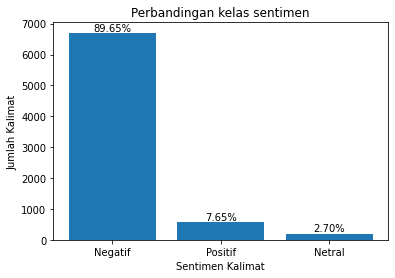

In [15]:
import matplotlib.pyplot as plt

# Menyiapkan data untuk plot
sentiments = ["Negatif", "Positif", "Netral"]
counts = [sentiment_counts["Negative"], sentiment_counts["Positive"], sentiment_counts["Neutral"]]

# Menghitung persentase untuk setiap kelas sentimen
total = sum(counts)
percentages = [count/total * 100 for count in counts]

# Membuat bar plot
plt.bar(sentiments, counts)

# Menambahkan keterangan nilai persentase di atas setiap batang
for i, count in enumerate(counts):
    plt.text(i, count, f"{percentages[i]:.2f}%", ha="center", va="bottom")

# Memberikan judul dan label sumbu pada plot
plt.title("Perbandingan kelas sentimen")
plt.xlabel("Sentimen Kalimat")
plt.ylabel("Jumlah Kalimat")

# Menampilkan plot
plt.show()


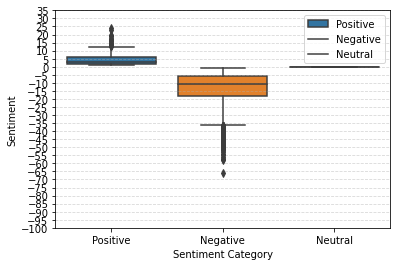

<Figure size 1440x864 with 0 Axes>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('labeled.csv')

# Melakukan one-hot encoding pada kolom "sentiment_category"
dummy_vars = pd.get_dummies(df["sentiment_category"])

# Menggabungkan dummy variables dengan dataframe utama
df_encoded = pd.concat([df, dummy_vars], axis=1)

# Menggunakan kolom dummy untuk box plot
sns.boxplot(data=df_encoded, x="sentiment_category", y="sentiment")

# Memberikan label pada sumbu x dan y
plt.xlabel("Sentiment Category")
plt.ylabel("Sentiment")

# Membuat legenda
plt.legend(labels=["Positive", "Negative", "Neutral"])

# Menambahkan grid
plt.grid(True, axis="y", linestyle="--", alpha=0.5)

# Menampilkan box plot
plt.yticks(range(-100, 40 , 5))  # Menampilkan angka kelipatan 5 dari -50 hingga 50
plt.figure(figsize=(20, 12))
plt.show()


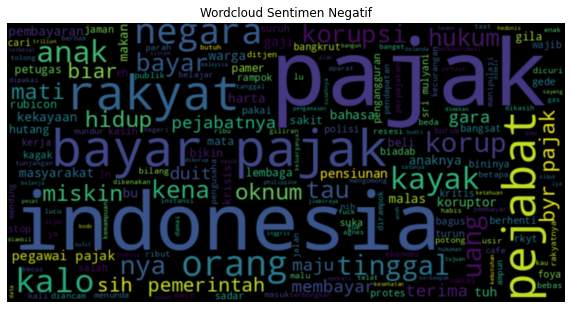

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Filter data sentimen negatif
df_negative = df[df['sentiment'] <=-40]

# Menggabungkan teks menjadi satu teks panjang
text_negative = ' '.join(df_negative['Word_After_Normalization_StopWords'])

# Membuat Wordcloud
wordcloud = WordCloud(width=800, height=400).generate(text_negative)

# Plot Wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.title('Wordcloud Sentimen Negatif')
plt.show()


### Pembagian Data Set : 80% Data Latih & 20% Data Uji

In [18]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan label (y)
X = data_labeled["Word_Stemmed"]
y = data_labeled["sentiment_category"]

# Membagi data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data train dan data test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))


Jumlah data train: 5984
Jumlah data test: 1496


## Ekstraksi Fitur TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menggunakan data train untuk fitting dan transformasi
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Menggunakan data test untuk transformasi
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Menampilkan dimensi matriks TF-IDF
print("Dimensi matriks TF-IDF (data train):", X_train_tfidf.shape)
print("Dimensi matriks TF-IDF (data test):", X_test_tfidf.shape)


Dimensi matriks TF-IDF (data train): (5984, 11719)
Dimensi matriks TF-IDF (data test): (1496, 11719)


In [20]:
data_index = 2
data_index_tfidf = X_train_tfidf[data_index]

print("Contoh perhitungan TF-IDF:")
print("Dokumen:", X_train.iloc[data_index])
print("TF-IDF:", data_index_tfidf)

Contoh perhitungan TF-IDF:
Dokumen: biaya pajak usaha masyarakat indonesia malasini hambat kembang usaha indonesia
TF-IDF:   (0, 4993)	0.38580393292575904
  (0, 3604)	0.4385563328617318
  (0, 6110)	0.5183676329468059
  (0, 4040)	0.1280578213142906
  (0, 6250)	0.2349063155128958
  (0, 11272)	0.4944641022815549
  (0, 1226)	0.26466538752328683
  (0, 7638)	0.06321682444926849


In [21]:
for i in range(len(X_train)):
   print("Tweet ke-", i+1)
   for feature in tfidf_vectorizer.get_feature_names():
      if X_train_tfidf[i, tfidf_vectorizer.vocabulary_[feature]] != 0:
          print(feature, ":", X_train_tfidf[i, tfidf_vectorizer.vocabulary_[feature]])
   print()

Tweet ke- 1
biaya : 0.30918943269096705
bp : 0.4507068350249003
kemarin : 0.3714342311409365
layan : 0.35831507384422867
nya : 0.25917200533637774
pajak : 0.07385164441373736
sih : 0.2692479049217831
tambah : 0.34520669402280774
total : 0.4130688486574644

Tweet ke- 2
anggap : 0.21057980342673896
bea : 0.1544020934288297
cukai : 0.15566834544380126
dasar

C:\Users\Dewan Dinata Tarigan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


 : 0.2051771557128743
ditjen : 0.3499353620286243
ivan : 0.3277503432241217
kemenkeu : 0.17034726679148796
kepala : 0.21361498361389727
menkeu : 0.20845875254135107
mulyani : 0.17415572746570118
nyata : 0.2316858198652809
pajak : 0.039970350372769095
pidana : 0.25205643604281425
ppatk : 0.24215775651433916
salah : 0.16415522668247579
sri : 0.1653962926211366
sumber : 0.19938702985947038
tekan : 0.24580090197938387
tindak : 0.21870246853789202
yustiavandana : 0.3277503432241217

Tweet ke- 3
biaya : 0.26466538752328683
hambat : 0.4385563328617318
indonesia : 0.1280578213142906
kembang : 0.38580393292575904
malasini : 0.5183676329468059
masyarakat : 0.2349063155128958
pajak : 0.06321682444926849
usaha : 0.4944641022815549

Tweet ke- 4
andin : 0.2161871458538506
army : 0.15972948712187263
batal : 0.1775437621005809
buya : 0.2064517322351371
chanbaek : 0.2161871458538506
fanny : 0.2161871458538506
hamka : 0.2064517322351371
indonesia : 0.02670349490844833
jaya : 0.5402205573277683
joshua : 

aksi : 0.29906340792359704
bea : 0.1815054256859093
cuci : 0.27391153303802945
cukai : 0.1829939522071445
hahaha : 0.3020156696458408
hebat : 0.2640472360646818
hedon : 0.25500514613059777
indonesia : 0.04759023173184924
jabat : 0.14135609606009014
nama : 0.21265429022388205
negeri : 0.17732739525900457
pajak : 0.04698663922305206
sangka : 0.2846654841473353
satu : 0.24425119502129192
segitu : 0.2679999664164101
triliun : 0.24754442127718407
tubi : 0.3852827655670211
uang : 0.14064644758073505

Tweet ke- 25
aneh : 0.2335030798318341
banget : 0.16871781524394572
bayar : 0.08859092823842743
copot : 0.5312774759989323
darimana : 0.29025240620921977
dirjen : 0.18321898370401596
doang : 0.22090877092032785
duit : 0.1630186885332453
hasil : 0.1510902656278108
indonesia : 0.04304216238851953
kalo : 0.12916357918728477
keras : 0.23156760555387895
kerja : 0.15558968518300867
koruptor : 0.20521669558214808
laku : 0.17652542583206404
langsung : 0.20335120580742008
pajak : 0.08499250715671193
rafa

energi : 0.21551055090769428
giat : 0.17056603750749863
hai : 0.14188622464285916
harga : 0.12792125718756167
indonesia : 0.03323331642188095
investasi : 0.1766856595716171
kak : 0.38909893617877644
negara : 0.18254929147431995
olah : 0.22762657101659153
republik : 0.1504121185753266
satu : 0.17056603750749863
sektor : 0.3605804776948143
sumber : 0.16367757971553387
surat : 0.17346946349059503
tksolan : 0.26905151738139377
usaha : 0.12832236095953645
wilayah : 0.1826820576163959
ya : 0.18809750529986838

Tweet ke- 45
bullshit : 0.8092317663852145
is : 0.5874895303518742

Tweet ke- 46
bayar : 0.10608707968349754
kejar : 0.5641164573922351
lembaga : 0.2750934440495388
masyarakat : 0.18909755083229673
pajakbiar : 0.417281457958906
pajakindonesia : 0.3851577550651018
sehatsehat : 0.3984902963817229
tau : 0.21362200007495674
wajib : 0.1794008937105237

Tweet ke- 47
anda : 0.40521972378301796
bayar : 0.11967116225838831
case : 0.3982388380014914
duduk : 0.2903510512613597
indonesia : 0.05814

spt : 0.2841448056906056
wajib : 0.24052402258557298

Tweet ke- 67
astagfirullah : 0.5910443189136687
banget : 0.2861706866164314
fee : 0.37230706904907085
gila : 0.3746943650405684
mahal : 0.33167122764388185
pajak : 0.07208001151248015
platform : 0.41780761007652134

Tweet ke- 68
ambon : 0.2671049460027036
amp : 0.24587149267239783
aset : 0.1821960697016305
banser : 0.21936002162243196
cuci : 0.1898946222885583
digruduk : 0.2671049460027036
indonesia : 0.032992875397071256
kafe : 0.2550765845630351
kantor : 0.14795657617338176
moga : 0.15257412335821785
naudzubillah : 0.5101531691260702
pajak : 0.03257442287627751
raya : 0.1565800543164748
salahcarimusuh : 0.2671049460027036
slrh : 0.2550765845630351
sodara : 0.2550765845630351
tsumma : 0.2671049460027036
uang : 0.09750594925064035

Tweet ke- 69
indonesia : 0.07131275004364712
min : 0.3186570372233743
moga : 0.32978272403438413
nyenyak : 0.5513375993456353
pajak : 0.07040828204377259
pegawai : 0.22278412196721084
salam : 0.4329814242

tolong : 0.16137041239004282
triliun : 0.16996936964493714
tuh : 0.1447409407057444

Tweet ke- 86
apbn : 0.48114742959387974
biaya : 0.39361415733862054
hapus : 0.5258580326373881
indonesia : 0.09522471355044335
pajak : 0.09401696730379208
rakyat : 0.23805297791583016
subsidi : 0.5123106666293268

Tweet ke- 87
akuntan : 0.2750828517927903
an : 0.21412422880289197
auditor : 0.2870240891472225
bayar : 0.08123860379763377
gelap : 0.2132257120115209
hutang : 0.19599527385145396
indonesia : 0.07894002797811574
kali : 0.17543964160074915
ln : 0.20128447465708874
lolos : 0.26242463010198863
miskin : 0.17797568575874972
multimilyuner : 0.3195428051781482
pajak : 0.11690823347209299
pantesan : 0.2435928894611291
publik : 0.21065908662149183
rakyat : 0.0986713849603484
ribu : 0.1821557488724912
sinergi : 0.25311344892761356
susah : 0.1982493339799645
terus : 0.26242463010198863
usaha : 0.30480770067516316

Tweet ke- 88
artikel : 0.23164668405947078
erti : 0.1902163798413252
indonesia : 0.0332376

pajak : 0.06348255676613328
spt : 0.2643847418458627
thx : 0.4804732008412107

Tweet ke- 104
antri : 0.3386296822450135
bahagiain : 0.3668727570900817
bayar : 0.09327148061046325
beli : 0.1870682423053166
biar : 0.18961570577496203
enak : 0.24092469611844478
indonesia : 0.04531622249005654
jabat : 0.40380498683921445
miskin : 0.20433703864153108
orang : 0.1276640293348663
pajak : 0.1342244145241383
pakai : 0.16640250571833198
rakyat : 0.11328636558134389
rubicon : 0.4311180296746156
tua : 0.2593413470646699
wow : 0.27967331298328135

Tweet ke- 105
ambruk : 0.288264051653218
beloon : 0.288264051653218
bisa : 0.24388101677998322
buruk : 0.20740135348130595
derita : 0.2216894993433658
ekonomi : 0.15939003363975074
garuk : 0.288264051653218
hancur : 0.19755704874008534
hutang : 0.176810088757291
indonesia : 0.07121290773517364
infrastruktur : 0.19484989389123533
jabat : 0.10576097510147998
model : 0.21149401456744285
mukmuk : 0.288264051653218
pajak : 0.035154853023522746
pimpin : 0.188583

terima : 0.1669225415797509
ya : 0.12794990849653498

Tweet ke- 126
aman : 0.22563216330401864
amp : 0.14690648266744089
bahas : 0.2220239707673023
drastis : 0.2867041718867826
harta : 0.15738067747096918
jarang : 0.2556688393514731
kalo : 0.2366240756445449
klarifikasi : 0.24332138064773795
konsultan : 0.4160669901591925
main : 0.20301198978388807
menkeu : 0.20301198978388807
mention : 0.30481292029172513
nongol : 0.30481292029172513
nyenggol : 0.30481292029172513
pajak : 0.07785195164616938
tukang : 0.22438817738769984

Tweet ke- 127
adil : 0.15897146085532035
aman : 0.19753285783182276
apbn : 0.17440132502305164
bangun : 0.13369763813170818
bayar : 0.2131266262906696
beda : 0.16865539850812297
deh : 0.1498836352110968
duit : 0.13072679035455145
erti : 0.19753285783182276
gereja : 0.26685276765334137
indonesia : 0.03451606554804945
jizyah : 0.27943644539863066
kayak : 0.11968308956955719
kristen : 0.27943644539863066
pajak : 0.03407829422734347
pakai : 0.2534880216899762
penting : 0.

menteri : 0.14276089891406968
pajak : 0.033497474051705584
pajakuntukkita : 0.21123792629202864
rangkai : 0.25352851866080733
sambut : 0.2623046095106868
sentral : 0.24672125374433782
sfconsulting : 0.22001401714190807
sfgroup : 0.22001401714190807
temu : 0.18566367665459796
tingkat : 0.16493343740266092
transferpricing : 0.22001401714190807

Tweet ke- 150
birokrasi : 0.20725206399429708
eselon : 0.20182024766645862
gede : 0.17205218434672057
harta : 0.27661793358231546
heran : 0.18350830514566388
iii : 0.2303664264356054
indonesia : 0.03464829528573169
jabat : 0.10291498020696742
jubir : 0.2805069558200019
kelas : 0.39439272308849427
kotor : 0.227397127132917
milyar : 0.4925614397348126
pajak : 0.034208846879703776
ruwet : 0.2373182545895025
skrgpun : 0.2805069558200019
tunjang : 0.19317089118032138
ya : 0.0980530775714026

Tweet ke- 151
agnes : 0.4734643402910239
duta : 0.5208341753734278
goes : 0.6980893052862843
indonesia : 0.09341995676974683
pajak : 0.09223510046570327

Tweet ke-

amp : 0.2545693748446386
bayar : 0.14061877532249173
etika : 0.49682015713214045
hina : 0.4607123856485667
indonesia : 0.06832004453115176
oknum : 0.31791427416954887
pajak : 0.06745353336743126
pegawai : 0.2134347802365997
proses : 0.3675630648062652
rakyat : 0.17079379339237805
tindak : 0.3690799335377021

Tweet ke- 170
bu : 0.5599939493333691
cc : 0.7111279164057017
indonesia : 0.12936759838762893
jabat : 0.3842573990348219
pajak : 0.12772681391513818

Tweet ke- 171
bayar : 0.12127129080564245
capecape : 0.4770068248358875
eh : 0.28790008411045026
indonesia : 0.05892001241790458
jadi : 0.29257765078015174
mesti : 0.3132495452416281
min : 0.26328078189050974
nya : 0.20414902588912517
pajak : 0.11634544593507717
ragu : 0.3973237966951069
rakyat : 0.14729458238264845
untuk : 0.4284635648084747

Tweet ke- 172
bayar : 0.10103086896395602
boikot : 0.28771990100124295
cemas : 0.326359479082048
cemaspura : 0.3973934283600864
cerita : 0.2841871461226408
contoh : 0.2630207689699401
gayus : 0.

KeyboardInterrupt: 

## Klasifikasi Multinomial Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
# Inisialisasi model Naive Bayes
naive_bayes = MultinomialNB()

# Melakukan fitting model menggunakan data train yang sudah dilakukan vektorisasi TF-IDF
naive_bayes.fit(X_train_tfidf, y_train)

# Melakukan prediksi menggunakan model Naive Bayes
y_pred = naive_bayes.predict(X_test_tfidf)

# Menampilkan hasil klasifikasi
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

    Negative       0.90      1.00      0.95      1345
     Neutral       0.00      0.00      0.00        32
    Positive       0.50      0.01      0.02       119

    accuracy                           0.90      1496
   macro avg       0.47      0.34      0.32      1496
weighted avg       0.85      0.90      0.85      1496



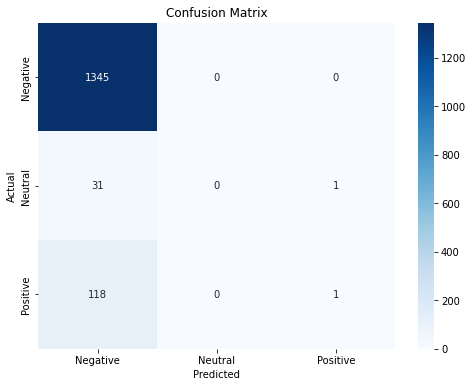

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Mendapatkan matriks kebingungan
cm = confusion_matrix(y_test, y_pred)

categories = ['Negative', 'Neutral', 'Positive']

# Visualisasi matriks kebingungan menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [24]:
# Menampilkan kalimat yang diprediksi untuk beberapa sampel
for i in range(5):  # Mengambil 5 sampel
    sample_index = i  # Ganti dengan indeks sampel yang ingin Anda lihat
    probabilities = naive_bayes.predict_proba(X_test_tfidf[sample_index].reshape(1, -1))
    predicted_class = naive_bayes.classes_[probabilities.argmax()]
    predicted_sentence = X_test.iloc[sample_index]  # Menyimpan kalimat asli dari sampel
    print(f"Sampel  {sample_index + 1}:")
    print(f"Predicted Class: {predicted_class}")
    print(f"Sentence: {predicted_sentence}")
    print()

Sampel  1:
Predicted Class: Negative
Sentence: lengkap administrasi kendara lengkap bayar pajak kendara motor mana premi swdkllj pt jasa raharja tolong korbankorban lakalantas indonesia jasaraharja bumnuntukindonesia

Sampel  2:
Predicted Class: Negative
Sentence: wakil rakyat indonesia wajib taat bayar pajak cemas sekian

Sampel  3:
Predicted Class: Negative
Sentence: akhirakhir benci paja indonesia kena pajak manfaat pajak bayar

Sampel  4:
Predicted Class: Negative
Sentence: asn tri uang hidup gelimang harta tau zaman orbadi indonesia bayar pajak kayak jabat pajak boro tax returned kaya amrik salah orang malas bayar pajak bu tau bu

Sampel  5:
Predicted Class: Negative
Sentence: maybe indonesia headline darah darah bayar pajakpara jabat pajak nya bermewahmewahan



In [25]:
# Menampilkan sampel dengan kelas positif
print("Samples with Positive Sentiment:")
positive_samples = X_test[y_pred == 'Positive']
for i, sample in enumerate(positive_samples):
    print(f"Sample {i+1}:")
    print(f"Sentence: {sample}")
    print()

# Menampilkan sampel dengan kelas negatif
print("Samples with Negative Sentiment:")
negative_samples = X_test[y_pred == 'Negative']
for i, sample in enumerate(negative_samples):
    print(f"Sample {i+1}:")
    print(f"Sentence: {sample}")
    print()

# Menampilkan sampel dengan kelas netral
print("Samples with Neutral Sentiment:")
neutral_samples = X_test[y_pred == 'Neutral']
for i, sample in enumerate(neutral_samples):
    print(f"Sample {i+1}:")
    print(f"Sentence: {sample}")
    print()


Samples with Positive Sentiment:
Sample 1:
Sentence: starting january dgt has reopened the vat refund for tourists service at international airports indonesia

Sample 2:
Sentence: wts want sale aab all about pc doyoung jaehyun nct min take pc ya take kasih free digipack baddies incl packing exc biaya admin and pajak batam indonesia free ongkir bantu rt ya bu banget thankyou slowacid dicon natrep sg

Samples with Negative Sentiment:
Sample 1:
Sentence: lengkap administrasi kendara lengkap bayar pajak kendara motor mana premi swdkllj pt jasa raharja tolong korbankorban lakalantas indonesia jasaraharja bumnuntukindonesia

Sample 2:
Sentence: wakil rakyat indonesia wajib taat bayar pajak cemas sekian

Sample 3:
Sentence: akhirakhir benci paja indonesia kena pajak manfaat pajak bayar

Sample 4:
Sentence: asn tri uang hidup gelimang harta tau zaman orbadi indonesia bayar pajak kayak jabat pajak boro tax returned kaya amrik salah orang malas bayar pajak bu tau bu

Sample 5:
Sentence: maybe in

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")


accuracy_percentage = accuracy * 100
precision_percentage = precision * 100
recall_percentage = recall * 100

print("Accuracy: {:.2f}%".format(accuracy_percentage))
print("Precision: {:.2f}%".format(precision_percentage))
print("Recall: {:.2f}%".format(recall_percentage))

Accuracy: 89.97%
Precision: 46.68%
Recall: 33.61%


C:\Users\Dewan Dinata Tarigan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


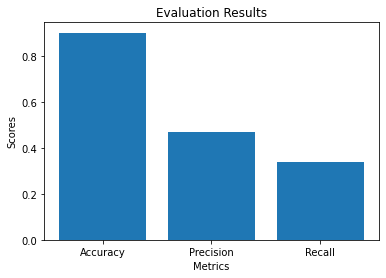

In [27]:
import matplotlib.pyplot as plt

# set data
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]

# create bar plot
fig, ax = plt.subplots()
ax.bar(metrics, scores)

# set axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Results')

# display plot
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np


# Mencetak TP, TN, FP, FN untuk setiap kelas
for i in range(len(cm)):
    TP = cm[i, i]
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + TP
    FP = np.sum(cm[:, i]) - TP
    FN = np.sum(cm[i, :]) - TP
    print(f"Kelas: {i}")
    print(f"True Positive (TP): {TP}")
    print(f"True Negative (TN): {TN}")
    print(f"False Positive (FP): {FP}")
    print(f"False Negative (FN): {FN}")
    print()


Kelas: 0
True Positive (TP): 1345
True Negative (TN): 2
False Positive (FP): 149
False Negative (FN): 0

Kelas: 1
True Positive (TP): 0
True Negative (TN): 1464
False Positive (FP): 0
False Negative (FN): 32

Kelas: 2
True Positive (TP): 1
True Negative (TN): 1376
False Positive (FP): 1
False Negative (FN): 118



In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes
naive_bayes = MultinomialNB()
#naive_bayes = MultinomialNB(alpha=10.0, class_prior=None, fit_prior=False)

# Definisikan grid parameter yang akan diuji
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.2, 0.3, 0.5]]  # Contoh penggunaan prior kelas manual
}


# Inisialisasi GridSearchCV dengan model dan parameter grid
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5)

# Melakukan fitting grid search pada data train
grid_search.fit(X_train_tfidf, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Best Parameters:", grid_search.best_params_)

# Menggunakan model dengan parameter terbaik untuk prediksi
y_pred = grid_search.predict(X_test_tfidf)


Best Parameters: {'alpha': 10.0, 'class_prior': None, 'fit_prior': False}


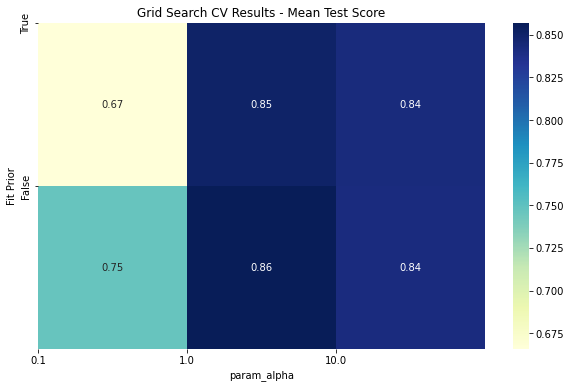

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat dataframe dari hasil GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
param_columns = ['param_alpha', 'param_fit_prior', 'param_class_prior']
score_columns = ['mean_test_score', 'std_test_score']
results = results[param_columns + score_columns]

# Mengubah nilai None pada class_prior menjadi 'None' untuk keperluan visualisasi
results['param_class_prior'] = results['param_class_prior'].replace({None: 'None'})

# Mengubah kolom param_alpha menjadi tipe float untuk keperluan visualisasi
results['param_alpha'] = results['param_alpha'].astype(float)

# Membuat pivot table untuk menampilkan skor rata-rata validasi silang
pivot_table = results.pivot_table(index='param_fit_prior', columns=param_columns[0], values='mean_test_score')

# Membuat heat map
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Grid Search CV Results - Mean Test Score')
plt.xlabel(param_columns[0])
plt.ylabel('Fit Prior')
plt.xticks(ticks=range(len(param_grid['alpha'])), labels=param_grid['alpha'])
plt.yticks(ticks=range(len(param_grid['fit_prior'])), labels=param_grid['fit_prior'])
plt.show()


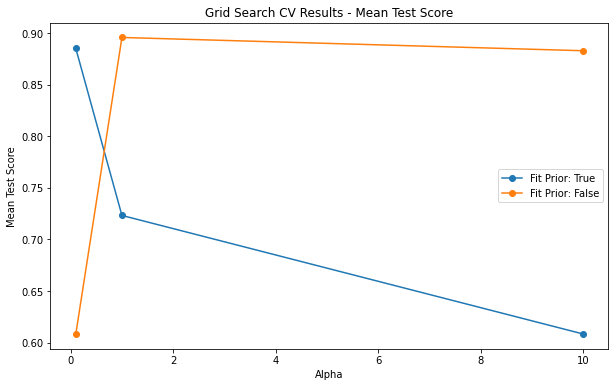

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Membuat list untuk menyimpan skor rata-rata validasi silang
alphas = param_grid['alpha']
fit_priors = param_grid['fit_prior']
mean_scores = results['mean_test_score']

# Menyiapkan array kosong untuk menyimpan skor rata-rata berdasarkan kombinasi parameter
scores_grid = np.empty((len(fit_priors), len(alphas)))

# Mengisi array dengan skor rata-rata sesuai dengan kombinasi parameter
for i, fit_prior in enumerate(fit_priors):
    for j, alpha in enumerate(alphas):
        index = i * len(alphas) + j
        scores_grid[i][j] = mean_scores[index]

# Membuat plot garis
plt.figure(figsize=(10, 6))
for i, fit_prior in enumerate(fit_priors):
    scores = scores_grid[i]
    plt.plot(alphas, scores, marker='o', label='Fit Prior: {}'.format(fit_prior))

# Menambahkan label dan judul plot
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.title('Grid Search CV Results - Mean Test Score')
plt.legend()

# Menampilkan plot garis
plt.show()


In [ ]:
# Menampilkan hasil klasifikasi
from sklearn.metrics import classification_report

# Menampilkan laporan klasifikasi
report = classification_report(y_test, y_pred)
print(report)


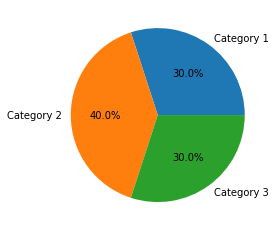

In [33]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# example data
labels = ['Category 1', 'Category 2', 'Category 3']
sizes = [30, 40, 30]

# create figure and axis
fig, ax = plt.subplots()

# create initial pie chart
pie = ax.pie(sizes, labels=labels, autopct='%1.1f%%')

# function to update pie chart
def update(frame):
    # update data
    sizes[0] += 1
    sizes[1] -= 1
    
    # clear previous pie chart
    ax.clear()
    
    # create updated pie chart
    pie = ax.pie(sizes, labels=labels, autopct='%1.1f%%')
    
    # set aspect ratio to be equal so pie is drawn as a circle
    ax.axis('equal')

# create animation
ani = animation.FuncAnimation(fig, update, frames=10, interval=500)

# display animation
plt.show()